In [25]:
# Installing necessary libraries
!pip install tensorflow
!pip install numpy
!pip install matplotlib
!pip install kaggle

In [35]:
# importing the necessary libraries.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from PIL import Image
import pandas as pd

In [27]:
# mounting the google drive
from google.colab import drive

drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
train_data_dir = '/content/drive/MyDrive/Male and Female face dataset/train'
validation_data_dir = '/content/drive/MyDrive/Male and Female face dataset/validation'
test_data_dir = '/content/drive/MyDrive/Male and Female face dataset/test'

img_width, img_height = 150, 150
batch_size = 32

In [38]:
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.convert("RGBA")
    image = image.resize((img_width, img_height))
    image_array = np.array(image)
    return image_array[:, :, :3]  # Keep only RGB channels, discarding the alpha channel

In [39]:
train_df = pd.DataFrame(columns=["filename", "class"])
validation_df = pd.DataFrame(columns=["filename", "class"])
test_df = pd.DataFrame(columns=["filename", "class"])

for class_label in os.listdir(train_data_dir):
    class_dir = os.path.join(train_data_dir, class_label)
    for filename in os.listdir(class_dir):
        train_df = train_df.append({"filename": os.path.join(class_dir, filename), "class": class_label}, ignore_index=True)

for class_label in os.listdir(validation_data_dir):
    class_dir = os.path.join(validation_data_dir, class_label)
    for filename in os.listdir(class_dir):
        validation_df = validation_df.append({"filename": os.path.join(class_dir, filename), "class": class_label}, ignore_index=True)

for class_label in os.listdir(test_data_dir):
    class_dir = os.path.join(test_data_dir, class_label)
    for filename in os.listdir(class_dir):
        test_df = test_df.append({"filename": os.path.join(class_dir, filename), "class": class_label}, ignore_index=True)


Streaming output truncated to the last 5000 lines.
<ipython-input-39-f0521dba66f7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({"filename": os.path.join(class_dir, filename), "class": class_label}, ignore_index=True)
<ipython-input-39-f0521dba66f7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({"filename": os.path.join(class_dir, filename), "class": class_label}, ignore_index=True)
<ipython-input-39-f0521dba66f7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({"filename": os.path.join(class_dir, filename), "class": class_label}, ignore_index=True)
<ipython-input-39-f0521dba66f7>:8: FutureWarning: The frame.append method is deprecated 

In [43]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    x_col="filename",
                                                    y_col="class",
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    preprocessing_function=preprocess_image)

validation_generator = test_datagen.flow_from_dataframe(validation_df,
                                                        x_col="filename",
                                                        y_col="class",
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size,
                                                        class_mode='binary',
                                                        preprocessing_function=preprocess_image)

test_generator = test_datagen.flow_from_dataframe(test_df,
                                                  x_col="filename",
                                                  y_col="class",
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  preprocessing_function=preprocess_image)


Found 3940 validated image filenames belonging to 2 classes.
Found 718 validated image filenames belonging to 2 classes.
Found 760 validated image filenames belonging to 2 classes.


In [44]:
# Building CNN model using the Sequential API from Keras.
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [45]:
# Training the Model using the fit function
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_steps)


Epoch 1/10
 28/123 [=====>........................] - ETA: 14:45 - loss: 0.7187 - accuracy: 0.5435

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


123/123 [==============================] - 1636s 13s/step - loss: 0.6083 - accuracy: 0.6666 - val_loss: 0.5339 - val_accuracy: 0.7401
Epoch 2/10
123/123 [==============================] - 207s 2s/step - loss: 0.4609 - accuracy: 0.7871 - val_loss: 0.3751 - val_accuracy: 0.8267
Epoch 3/10
123/123 [==============================] - 206s 2s/step - loss: 0.3598 - accuracy: 0.8329 - val_loss: 0.3152 - val_accuracy: 0.8736
Epoch 4/10
123/123 [==============================] - 205s 2s/step - loss: 0.3051 - accuracy: 0.8703 - val_loss: 0.2901 - val_accuracy: 0.8807
Epoch 5/10
123/123 [==============================] - 203s 2s/step - loss: 0.2760 - accuracy: 0.8825 - val_loss: 0.2207 - val_accuracy: 0.8963
Epoch 6/10
123/123 [==============================] - 202s 2s/step - loss: 0.2312 - accuracy: 0.9020 - val_loss: 0.2024 - val_accuracy: 0.9119
Epoch 7/10
123/123 [==============================] - 190s 2s/step - loss: 0.2071 - accuracy: 0.9120 - val_loss: 0.2271 - val_accuracy: 0.9162
Epoch 8/

In [46]:
# evaluateingthe model's performance on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


23/23 [==============================] - 438s 20s/step - loss: 0.0956 - accuracy: 0.9755
Test Loss: 0.0956
Test Accuracy: 0.9755


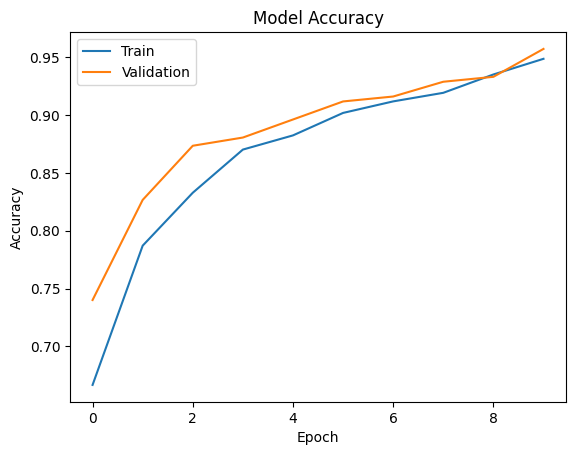

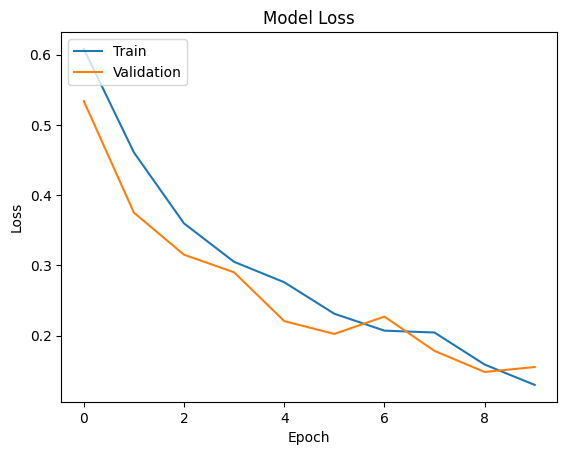

In [47]:
# Visualize the Training Process
# Ploting the accuracy and loss curves to visualize the training process.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [49]:
test_generator.reset()  # Reset the test generator
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).flatten()  # Convert probabilities to binary predictions (0 or 1)
y_true = test_generator.classes  # True labels from the test generator


24/24 [==============================] - 25s 1s/step


In [50]:
cm = confusion_matrix(y_true, y_pred)


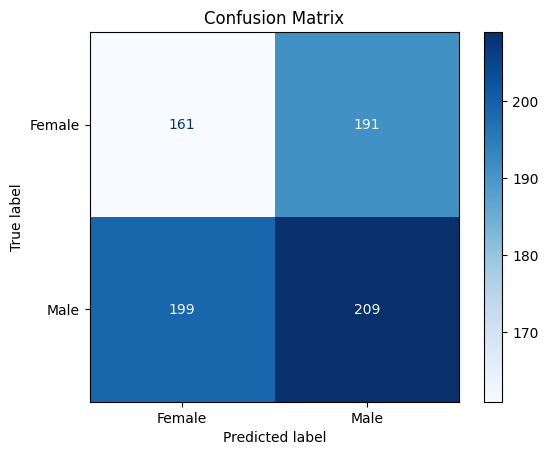

In [51]:
labels = ['Female', 'Male']  # Update with your class labels if different
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [53]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


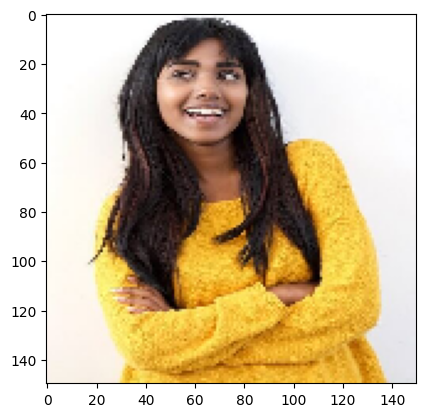

In [57]:
image_path = '/content/Screenshot from 2023-07-05 19-31-21.png'
image = load_img(image_path, target_size=(img_width, img_height))
image_array = img_to_array(image) / 255.0  # Convert image to array and normalize pixel values
image_array = np.expand_dims(image_array, axis=0)  # Add an extra dimension to match the model's input shape

plt.imshow(image)

In [56]:
predictions = model.predict(image_array)
class_labels = ['Female', 'Male']  # Define your class labels

# Get the predicted class index (0 for cat, 1 for dog)
predicted_class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label
print(f"Predicted Class: {predicted_class_label}")


1/1 [==============================] - 0s 214ms/step
Predicted Class: Female
